<a href="https://colab.research.google.com/github/timotiushaniel/machine-learning-fundamental/blob/main/Messy_Vs_Clean_Room_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf

In [20]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2020-10-20 17:58:32--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  19.8MB/s    in 3.4s    

2020-10-20 17:58:36 (19.8 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



Kode di bawah berfungsi untuk mengekstraksi data yang sebelumnya kita unduh. Lalu kita mendefinisikan nama direktori untuk data latih dan data validasi.

In [21]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

Kita dapat melihat struktur data yang telah kita unduh di bawah. Dapat Anda lihat bahwa pada direktori data latih dan data validasi masing-masing memiliki sub-direktori clean dan messy. Setiap sub-direktori menyimpan gambar yang sesuai dengan nama sub-direktori tersebut. Jadi, pada sub-direktori ‘clean’ terdapat gambar-gambar ruangan yang rapi dan pada sub-direktori ‘messy’ terdapat gambar-gambar ruangan yang berantakan.

In [22]:
os.listdir('/tmp/images/train')

['clean', 'messy']

In [23]:
os.listdir('/tmp/images/val')

['clean', 'messy']

Hal selanjutnya adalah kita menampung direktori dari setiap kelas pada direktori latih dan direktori validasi ke dalam variabel. Pembuatan direktori di sini akan dipakai saat menggunakan objek image data generator.

In [24]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')
 
# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

Langkah selanjutnya adalah kita membuat sebuah objek ImageDataGenerator untuk data training dan data testing. Image data generator adalah sebuah fungsi yang sangat berguna untuk mempersiapkan data latih dan data testing yang akan diberikan ke model. Beberapa kemudahan yang disediakan Image data generator adalah, preprocessing data, pelabelan sampel otomatis, dan augmentasi gambar.

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

Lalu kita dapat menggunakan objek image data generator sebelumnya untuk mempersiapkan data latih yang akan dipelajari oleh model.

In [26]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


Setelah data telah siap, kita bisa membangun arsitektur sebuah CNN. Sebuah CNN pada keras mirip dengan MLP untuk klasifikasi fashion MNIST yang kita bahas sebelumnya. Perbedaannya hanya pada terdapatnya 2 lapis layer konvolusi dan max pooling. Anda tentu masih ingat bahwa fungsi dari layer konvolusi adalah untuk mengekstraksi atribut pada gambar. Sedangkan layer max pooling berguna untuk mereduksi resolusi gambar sehingga proses pelatihan MLP lebih cepat.

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Setelah membuat arsitektur dari CNN, jangan lupa untuk memanggil fungsi compile pada objek model, dan tentukan loss function serta optimizer.

In [28]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Setelah menentukan loss function dan optimizer pada CNN, kita dapat melatih model kita menggunakan metode fit. Dengan menggunakan image data generator, kita tidak perlu memasukkan parameter gambar dan labelnya. Image data generator secara otomatis melabeli sebuah gambar sesuai dengan direktori di mana ia disimpan. Contohnya sebuah gambar yang terdapat di direktori clean, secara otomatis akan diberi label “clean” oleh image data generator.

In [29]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 6s - loss: 0.7728 - accuracy: 0.5100 - val_loss: 0.6903 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 6s - loss: 0.6830 - accuracy: 0.5300 - val_loss: 0.6601 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 6s - loss: 0.7101 - accuracy: 0.4900 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 4/20
25/25 - 6s - loss: 0.6940 - accuracy: 0.5100 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 6s - loss: 0.6915 - accuracy: 0.5100 - val_loss: 0.6789 - val_accuracy: 0.5000
Epoch 6/20
25/25 - 6s - loss: 0.7175 - accuracy: 0.5200 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 7/20
25/25 - 10s - loss: 0.6854 - accuracy: 0.5400 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 8/20
25/25 - 6s - loss: 0.7161 - accuracy: 0.5200 - val_loss: 0.6826 - val_accuracy: 0.5000
Epoch 9/20
25/25 - 6s - loss: 0.7107 - accuracy: 0.4700 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 10/20
25/25 - 6s - loss: 0.6928 - accuracy: 0.5600 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 11/20
25/25 

Kode di bawah memungkinkan kita untuk secara interaktif memilih sebuah berkas gambar, kemudian melakukan resize gambar dan mengubahnya menjadi larik numpy. Prediksi dari model kita:

Saving 31aac7c3-a29a-4598-851d-7004b5850164.png to 31aac7c3-a29a-4598-851d-7004b5850164 (1).png
31aac7c3-a29a-4598-851d-7004b5850164.png
messy


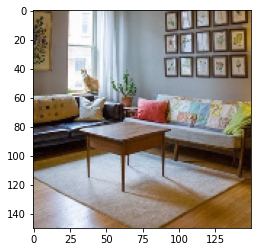

In [31]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')